# import model

In [2]:
from transformers import pipeline

checkpoint = "vinvino02/glpn-nyu"
depth_estimator = pipeline("depth-estimation", model=checkpoint)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [4]:
from PIL import Image

## loading image

In [5]:
image = Image.open(r"test.JPG")
image.thumbnail((256, 256))
image.show()

## predict image

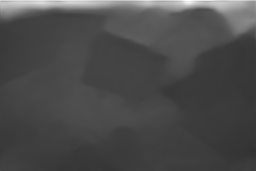

In [7]:

predictions = depth_estimator(image)


predictions["depth"]

# very slow live monocular estimation

In [9]:
import cv2 
import numpy as np

cap = cv2.VideoCapture(0)

while(True): 
    ret, frame = cap.read()  
    
    if ret:
        color_coverted = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
        pil_image = Image.fromarray(color_coverted)
        pil_image.thumbnail((500, 500))
        
        predictions = depth_estimator(pil_image)
        depth = np.array(predictions["depth"])
        
        cv2.imshow('depth', depth)  
        cv2.imshow('frame', frame)  
        
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    
cap.release()
  
# De-allocate any associated memory usage  
cv2.destroyAllWindows() 


KeyboardInterrupt: 